In [191]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.fft import fft, fftfreq
from statsmodels.stats.stattools import durbin_watson

In [192]:
data=pd.read_csv('data_lab3.csv', delimiter=',')

In [193]:
data.head(15)

,Y2,X1,X2,X3,X4,X9,X10,X11,X12,X13,X14
0,204.2,0.23,0.78,0.40,1.37,167.69,47750,6.40,166.32,10.08,17.72
1,209.6,0.24,0.75,0.26,1.49,186.10,50391,7.80,92.88,14.76,18.39
2,222.6,0.19,0.68,0.40,1.44,220.45,43149,9.76,158.04,6.48,26.46
3,236.7,0.17,0.70,0.50,1.42,169.30,41089,7.90,93.96,21.96,22.37
4,62.0,0.23,0.62,0.40,1.35,39.53,14257,5.35,173.88,11.88,28.13
5,53.1,0.43,0.76,0.19,1.39,40.41,22661,9.90,162.30,12.60,17.55
6,172.1,0.31,0.73,0.25,1.16,102.96,52509,4.50,88.56,11.52,21.92
7,56.5,0.26,0.71,0.44,1.27,37.02,14903,4.88,101.16,8.28,19.52
8,52.6,0.49,0.69,0.17,1.16,45.74,25587,3.46,166.32,11.52,23.99
9,46.6,0.36,0.73,0.39,1.25,40.07,16821,3.60,140.76,32.40,21.76


In [194]:
y = data["Y2"]
X = data.drop(columns=["Y2"])

In [195]:
X.head()    

,X1,X2,X3,X4,X9,X10,X11,X12,X13,X14
0,0.23,0.78,0.40,1.37,167.69,47750,6.40,166.32,10.08,17.72
1,0.24,0.75,0.26,1.49,186.10,50391,7.80,92.88,14.76,18.39
2,0.19,0.68,0.40,1.44,220.45,43149,9.76,158.04,6.48,26.46
3,0.17,0.70,0.50,1.42,169.30,41089,7.90,93.96,21.96,22.37
4,0.23,0.62,0.40,1.35,39.53,14257,5.35,173.88,11.88,28.13


In [196]:
y.head()    

0    204.2
1    209.6
2    222.6
3    236.7
4     62.0
Name: Y2, dtype: float64

In [197]:
included = []
residuals = y
model =None
model_results = []

In [ ]:
# Пошаговое включение факторов
while True:
    # Вычисление корреляций остатков с факторами
    correlations = X.apply(lambda col: np.corrcoef(col, residuals)[0, 1])
    
    # Исключение уже включенных факторов
    correlations = correlations.drop(included, errors='ignore')
    
    # Если не осталось факторов, завершаем процесс
    if correlations.empty:
        print("Нет факторов для добавления. Процесс завершен.")
        break
    
    # Выбор фактора с максимальной корреляцией
    best_factor = correlations.idxmax()
    
    # Временное добавление фактора в модель
    temp_included = included + [best_factor]
    X_model = sm.add_constant(X[temp_included])
    temp_model = sm.OLS(y, X_model).fit()
    
    # Проверка значимости коэффициента добавленного фактора
    p_value = temp_model.pvalues[best_factor]
    
    if p_value <= 0.05:  # Если коэффициент значим
        included.append(best_factor)  # Добавляем фактор в модель
        model = temp_model  # Обновляем модель
        residuals = y - model.predict(X_model)  # Обновляем остатки
        
        # Статистика Дарбина-Уотсона
        dw_statistic = durbin_watson(residuals)
        
        # Сохранение результатов модели
        model_results.append({
            "Фактор": best_factor,
            "Коэффициент": model.params[best_factor],
            "P-значение": p_value,
            "R^2": model.rsquared,
            "Скорректированный R^2": model.rsquared_adj,
            "F-статистика": model.fvalue,
            "P-значение (F-статистика)": model.f_pvalue,
            "Статистика Дарбина-Уотсона": dw_statistic,
        })
        
        print(f"Добавлен фактор: {best_factor}")
        print(model.summary())
        print(f"Статистика Дарбина-Уотсона: {dw_statistic:.4f}")
    else:  # Если коэффициент незначим
        print(f"Фактор {best_factor} незначим (p-value = {p_value:.4f}). Пропускаем.")
        X = X.drop(columns=[best_factor])  # Удаляем фактор из дальнейшего рассмотрения

# Создание DataFrame с результатами
results_df = pd.DataFrame(model_results)

# Экспорт в Excel
results_df.to_excel("Результаты_моделей.xlsx", index=False)
print("Результаты экспортированы в файл 'Результаты_моделей.xlsx'.")

Добавлен фактор: X10
                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.62e-16
Time:                        19:52:20   Log-Likelihood:                -291.42
No. Observations:                  53   AIC:                             586.8
Df Residuals:                      51   BIC:                             590.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.1268     14.43

In [199]:
# Создание DataFrame с результатами
results_df = pd.DataFrame(model_results)

# Экспорт в Excel
results_df.to_excel("Результаты_моделей.xlsx", index=False)
print("Результаты экспортированы в файл 'Результаты_моделей.xlsx'.")

Результаты экспортированы в файл 'Результаты_моделей.xlsx'.


In [200]:
X_final = sm.add_constant(X[included])
y_pred = model.predict(X_final)

In [201]:
y.head(15)

0     204.2
1     209.6
2     222.6
3     236.7
4      62.0
5      53.1
6     172.1
7      56.5
8      52.6
9      46.6
10     53.2
11     30.1
12    146.4
13     18.1
14     13.6
Name: Y2, dtype: float64

In [202]:
X_final = sm.add_constant(X[included])  # Добавляем константу
y_pred = model.predict(X_final)  # Предсказанные значения

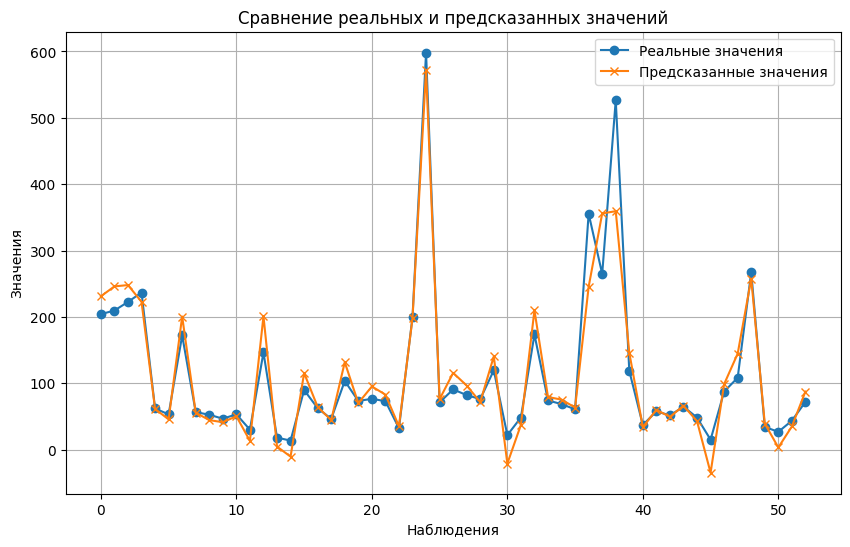

In [203]:
plt.figure(figsize=(10, 6))
plt.plot(y.to_numpy(), label="Реальные значения", marker="o")
plt.plot(y_pred, label="Предсказанные значения", marker="x")
plt.xlabel("Наблюдения")
plt.ylabel("Значения")
plt.title("Сравнение реальных и предсказанных значений")
plt.legend()
plt.grid()
plt.show()

In [205]:
# Остаточная дисперсия из модели
residual_variance_model = model.mse_resid

print(f"Остаточная дисперсия для модели: {residual_variance_model:.4f}")

Остаточная дисперсия для модели: 1415.5178


In [213]:
# Тест Шапиро-Уилка
from scipy.stats import shapiro
shapiro_test = shapiro(model.resid)
print(f"Тест Шапиро-Уилка: статистика = {shapiro_test[0]:.4f}, p-value = {shapiro_test[1]:.4f}")

# Интерпретация
if shapiro_test[1] > 0.05:
    print("Остатки распределены нормально (p-value > 0.05).")
else:
    print("Остатки не распределены нормально (p-value ≤ 0.05).")

Тест Шапиро-Уилка: статистика = 0.7925, p-value = 0.0000
Остатки не распределены нормально (p-value ≤ 0.05).


In [214]:
from statsmodels.stats.diagnostic import het_breuschpagan
# Тест Бреуша-Пагана
bp_test = het_breuschpagan(residuals, X_final)
print(f"Тест Бреуша-Пагана: статистика = {bp_test[0]:.4f}, p-value = {bp_test[1]:.4f}")

# Интерпретация
if bp_test[1] > 0.05:
    print("Остатки гомоскедастичны (p-value > 0.05).")
else:
    print("Остатки гетероскедастичны (p-value ≤ 0.05).")

Тест Бреуша-Пагана: статистика = 15.9015, p-value = 0.0012
Остатки гетероскедастичны (p-value ≤ 0.05).
